# EXP 10: Project

# Cardiac disease prediction using Machine Learning Algorithm

made by:
21BEC114 Divyanshu shah
21BEC105 Dhyan Rathod

### Objective:To predict the cardiac disease for different age people

#### Code

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
heart_df = pd.read_csv(r"C:\Users\HP\Downloads\heart.csv")
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [2]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3]:
heart_df.astype({'oldpeak':'int64'}).dtypes

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int64
slope       int64
ca          int64
thal        int64
target      int64
dtype: object

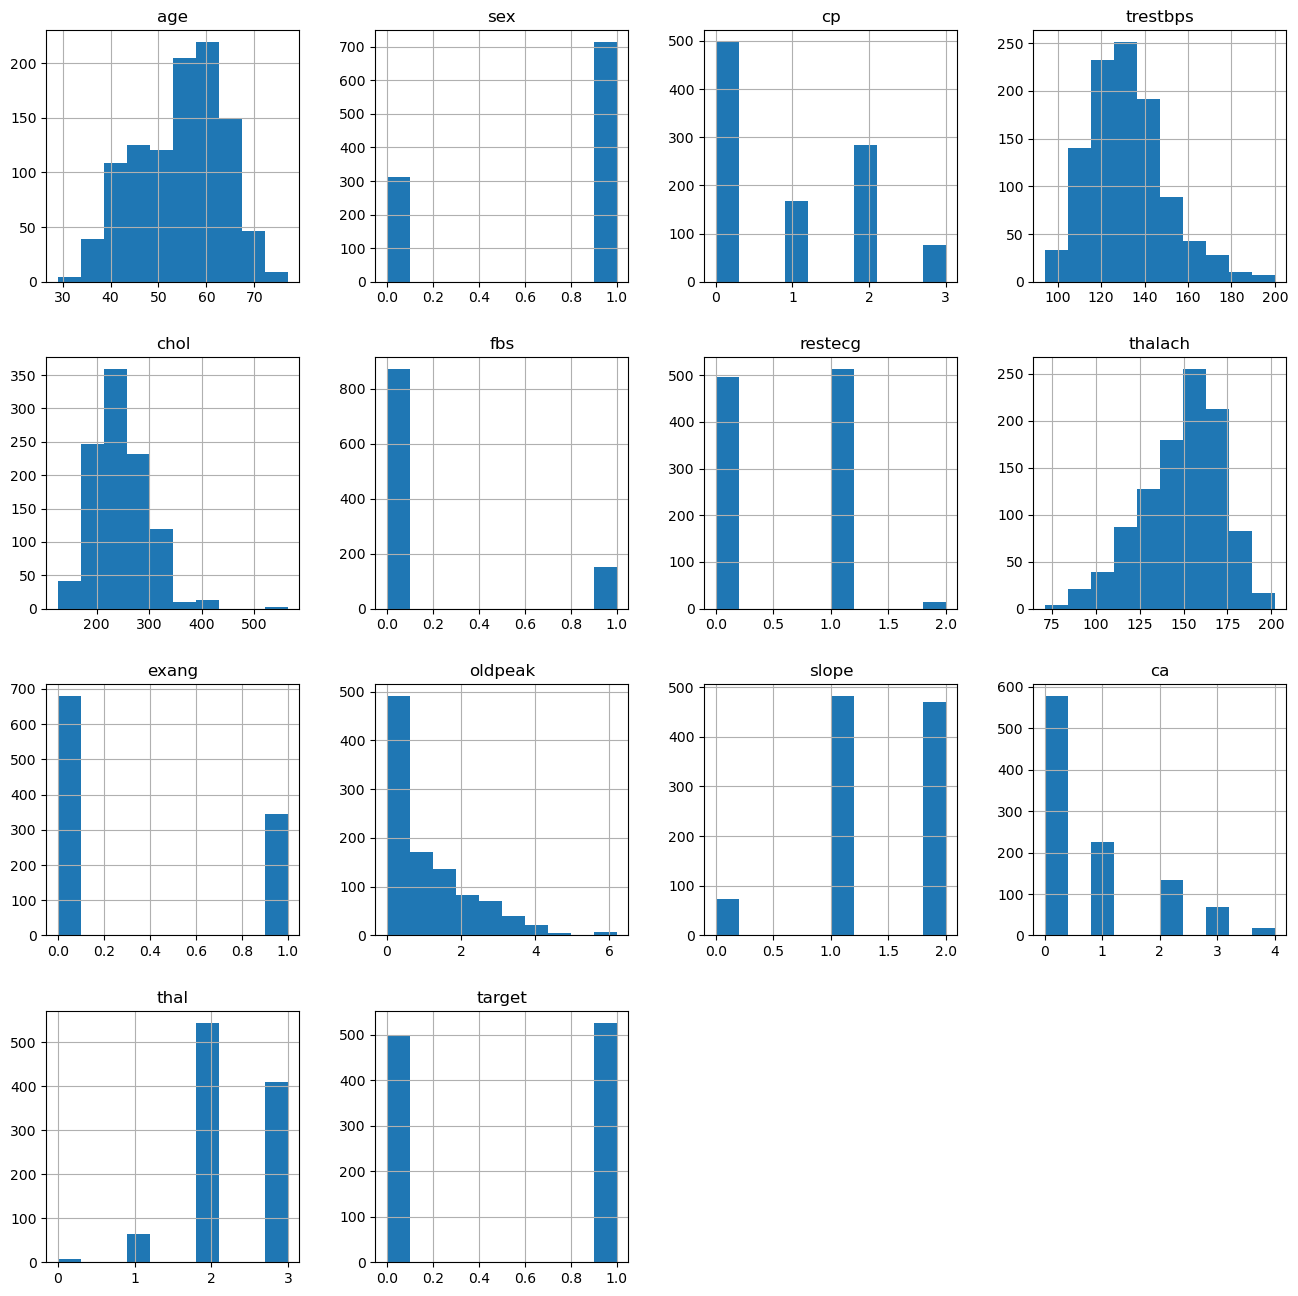

In [4]:
heart_df.hist(figsize=(16,16));

target
1    526
0    499
Name: count, dtype: int64


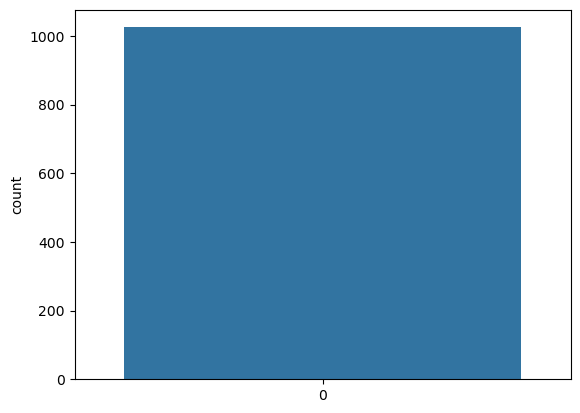

In [7]:
target = heart_df["target"]
sns.countplot(target);
target_temp = heart_df.target.value_counts()
print(target_temp)

In [3]:
X = heart_df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].values
X

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [4]:
y = heart_df[['target']].values
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [8]:
#Linear regression
from sklearn.linear_model import LinearRegression
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=4)
lnr = LinearRegression()
lnr.fit(X_train, y_train)
print("Accuracy=",lnr.score(X_test, y_test))

Accuracy= 0.46354924736425507


In [11]:
#logistic regression
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=4)
lgr = LogisticRegression(random_state = 2, max_iter=1000)
lgr.fit(X_train, y_train)
print("Accuracy=",lgr.score(X_test, y_test))

Accuracy= 0.8195121951219512


In [10]:
#Random forest classifier
import warnings
warnings.filterwarnings("ignore")
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

print("Accuracy=",classifier.score(X_test,y_test))

Accuracy= 0.9902439024390244


By comparing different machine learning algorithm, Random Forest Classifier has highest accuracy of 99% 

<Axes: >

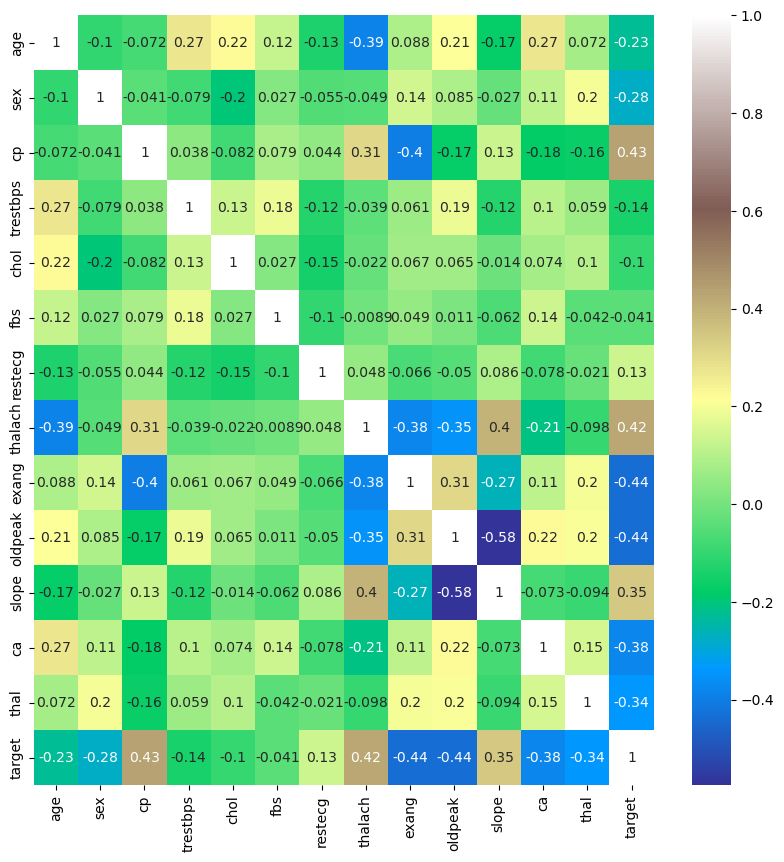

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_df.corr(), annot=True, cmap='terrain')

## Results:

In [12]:
print("Percentage of patience without heart problemsin(%): "+str(round(target_temp[0]*100/1025,2)))
print("Percentage of patience with heart problems in(%): "+str(round(target_temp[1]*100/1025,2)))

Percentage of patience without heart problemsin(%): 48.68
Percentage of patience with heart problems in(%): 51.32


In [5]:
countFemale = len(heart_df[heart_df.sex == 0])
countMale = len(heart_df[heart_df.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(heart_df.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(heart_df.sex))*100))

Percentage of Female Patients:30.44%
Percentage of Male Patients:69.56%


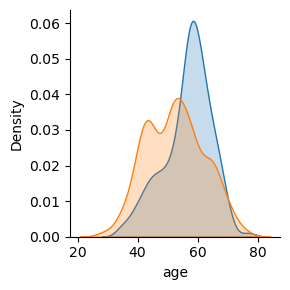

In [107]:
import warnings
warnings.filterwarnings("ignore")
def plotAge():
    facet_grid = sns.FacetGrid(heart_df, hue='target')
    facet_grid.map(sns.kdeplot, "age", shade=True, ax=axes[0])
    legend_labels = ['disease false', 'disease true']
    (fig_age, axes) 

plotAge()

#### Observations:
From the density vs age plot,we can say that our model is correctly able to predict the heart disease with maximum accuracy at 55 years to 70 years

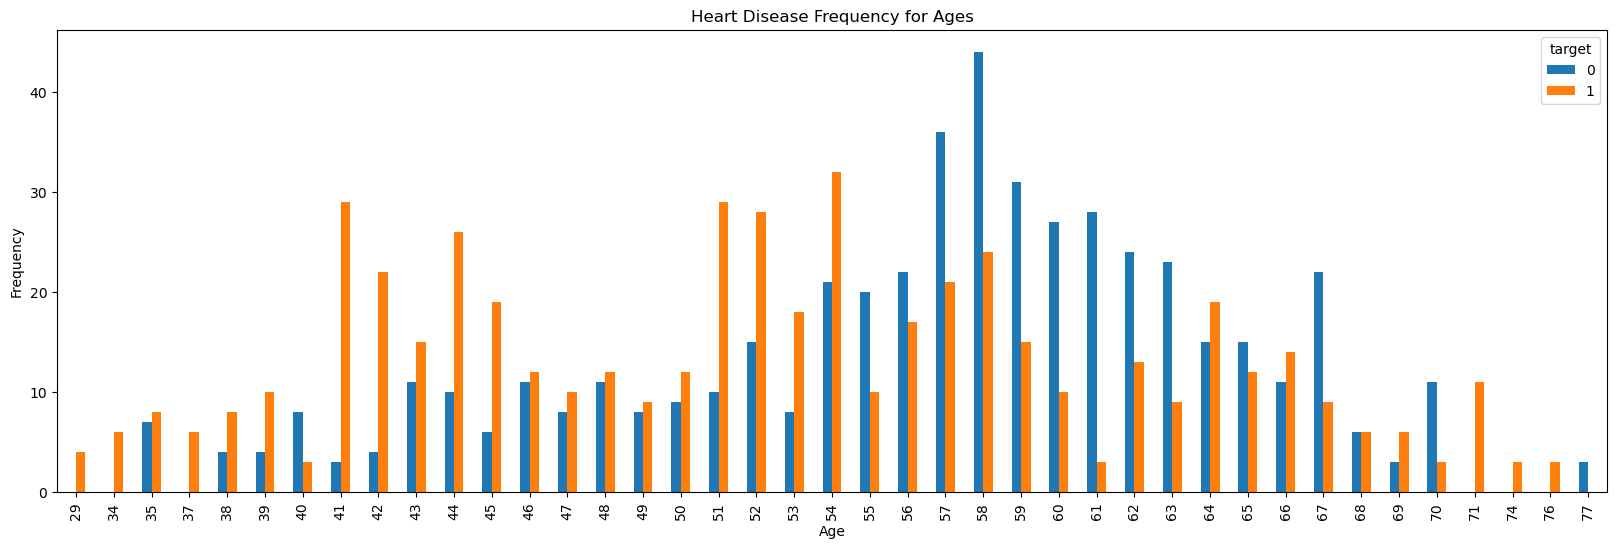

In [30]:
pd.crosstab(heart_df.age,heart_df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

#### Observations:
from the frequency vs age plot,we can say that the chances for heart disease is more at the age of 54 in male, while for female the chances of heart disease is more at the age of 58     

#### Conclusion:
In this project, we have trained our model and predicted the heart related problems at different age of people using different machine learning algorithms and found out that Random Forest Classifier has higher accuracy of 99% which will predict the heart disease so that it can be prevented or cure early. Here we have plotted two curves which will have the data for different age of people which will ensure the heart related conditions.